In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive/')

Mounted at /content/drive


['Mane_Minasyan_Assignment group functioning - individual part 2023.docx',
 'Report Group 6.gdoc',
 'Meeting reports',
 'Protocol Elements ROSE study_2024.gdoc',
 'ROSE STUDY GROUP 17 SLIDES_group17.pptx',
 'Tree.html',
 'Data Visualization-Visual 1 demo.mov',
 'Demo-visual1.mov',
 'group34_report_design.gdoc',
 'Kaggle',
 'Colab Notebooks',
 'UHASSELT_signed.pdf',
 '1_Spark_Overview.ipynb',
 '2_Exercises.ipynb',
 '1_Spark_Overview (1).ipynb',
 '3_Dataframe_Overview.ipynb',
 'ANN_&_DL_2425_Homework_ManeMinasyan.ipynb',
 'world_happiness_2015.csv',
 'dimensionality_reduction_countries_ManeMinasyan.ipynb',
 'Digital Epidemology',
 'Deep Learning Project',
 '2_Exercises_filled_ManeMinasyan.ipynb',
 '4_Exercises_Dataframe_filled_ManeMinasyan.ipynb',
 'tutorial2_filled_ManeMinasyan.ipynb',
 'tutorial.ipynb',
 'Master thesis intermediate presentations_ManeMinasyan.pptx',
 'Master thesis intermediate presentations_ManeMinasyan.pdf',
 'March28_Session 3_Mane_Minasyan_intermediate presentation.

In [3]:
df_flu = pd.read_csv("/content/drive/My Drive/Digital Epidemology/data/flu_data_complete_new.csv",index_col=0)
df_flu["Year-Month"] = pd.to_datetime(df_flu["Year-Month"], errors="coerce")

In [4]:
correlation_matrix = df_flu.corr()

In [5]:
flu_correlations = correlation_matrix[["INF_ALL"]].sort_values(by="INF_ALL", ascending=False)
print(flu_correlations)

                           INF_ALL
INF_ALL                   1.000000
INF_A                     0.961876
SPEC_PROCESSED_NB         0.684694
Influenza: (Netherlands)  0.542864
INF_B                     0.469651
Total Search              0.461457
Griep: (Netherlands)      0.421054
wind_speed                0.391749
hourly_lowest             0.383666
flu: (Netherlands)        0.356838
hourly_highest            0.339288
Year-Month                0.216514
ISO_YEAR                  0.210180
24_avg_humidity           0.154172
24_precipitation          0.050669
ILI_ACTIVITY             -0.039907
sunshine_duration        -0.295117
ISO_WEEK                 -0.337294
evaporation              -0.374787
24_avg_temp              -0.461138


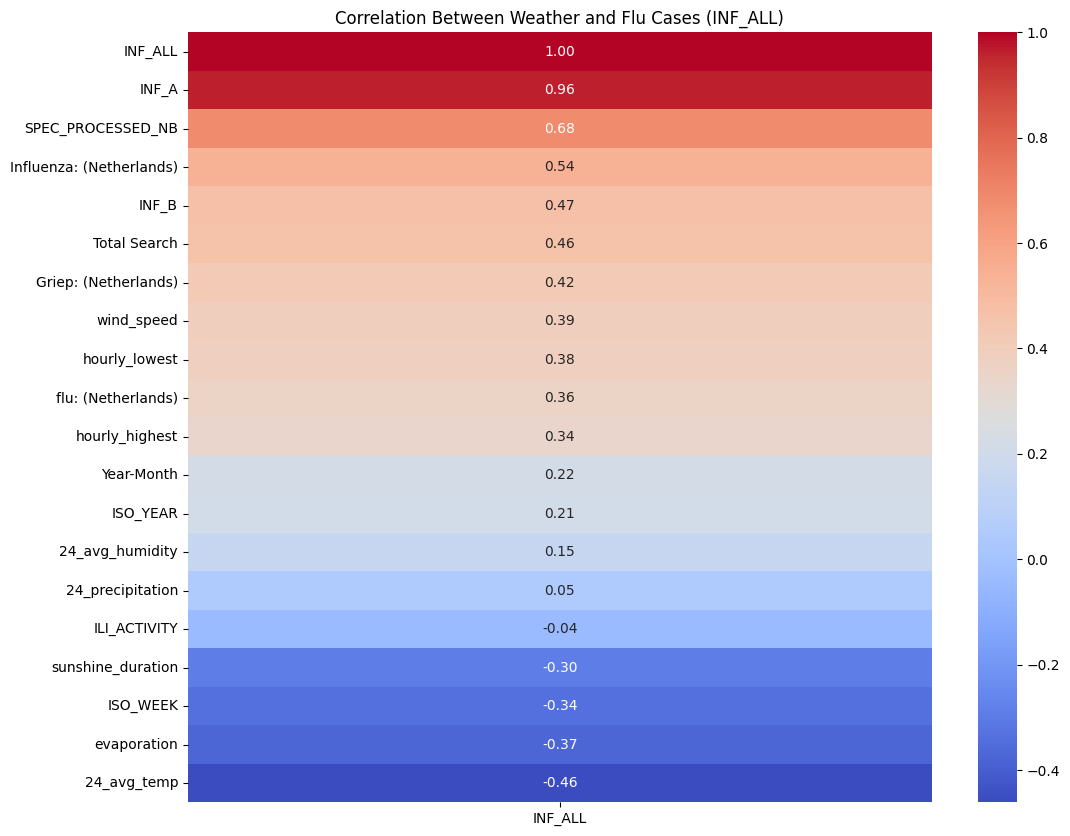

In [6]:
flu_weather_corr = df_flu.corr()[["INF_ALL"]].sort_values(by="INF_ALL", ascending=False)
plt.figure(figsize=(12, 10))
sns.heatmap(flu_weather_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather and Flu Cases (INF_ALL)")
plt.show()

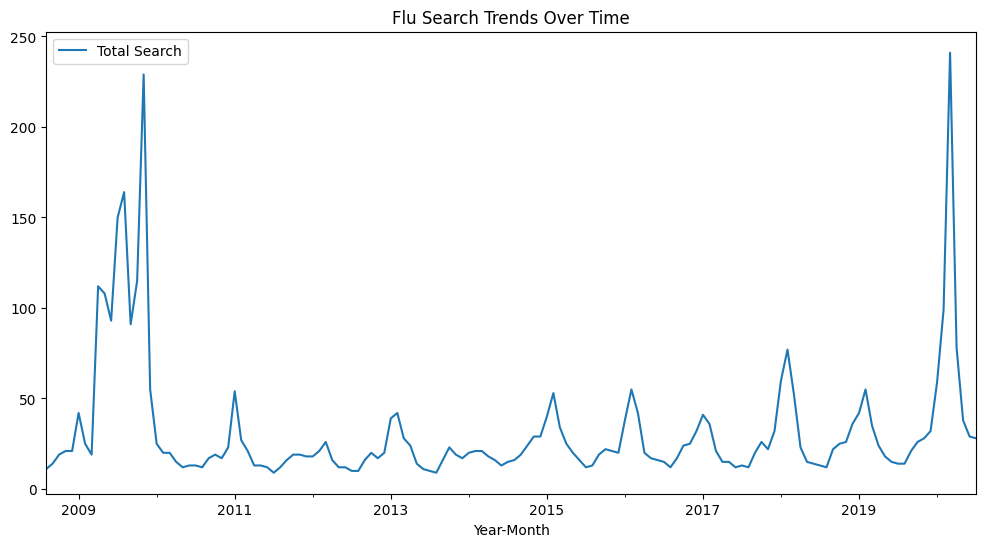

In [ ]:
df_flu.plot(x="Year-Month", y="Total Search", kind="line", figsize=(12,6))
plt.title("Flu Search Trends Over Time")
plt.show()

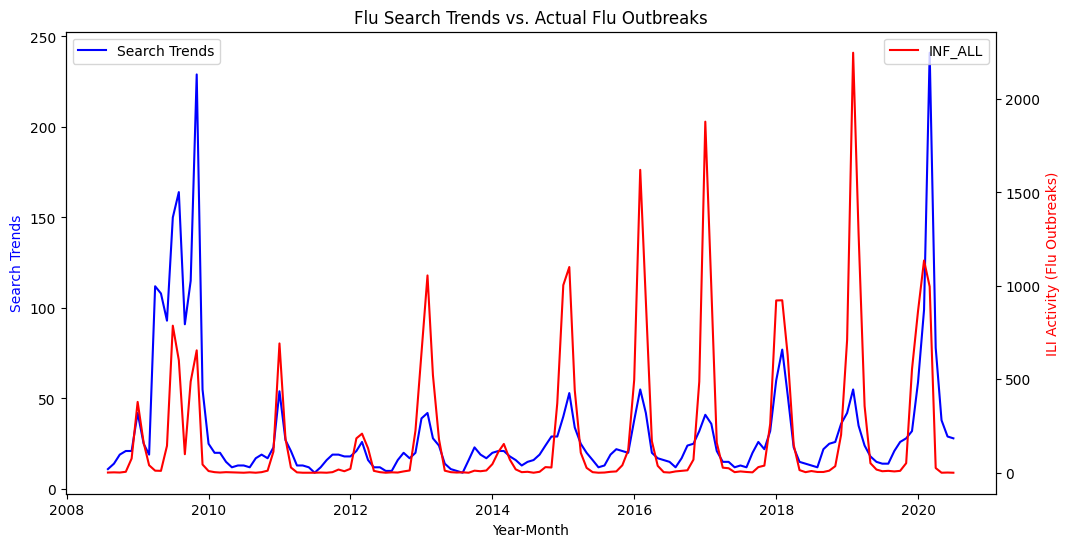

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot search trends
sns.lineplot(data=df_flu, x="Year-Month", y="Total Search", ax=ax1, label="Search Trends", color="blue")

# Create secondary Y-axis for flu outbreaks
ax2 = ax1.twinx()
sns.lineplot(data=df_flu, x="Year-Month", y="INF_ALL", ax=ax2, label="INF_ALL", color="red")

# Labels and title
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Search Trends", color="blue")
ax2.set_ylabel("ILI Activity (Flu Outbreaks)", color="red")
plt.title("Flu Search Trends vs. Actual Flu Outbreaks")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()